The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


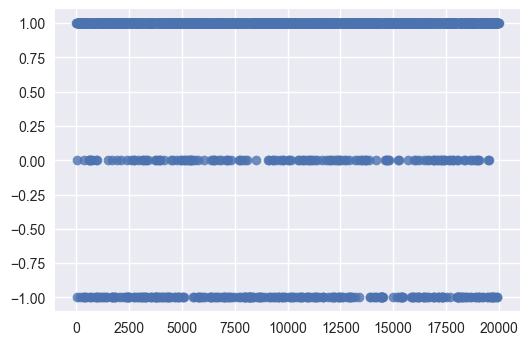

In [94]:
%load_ext autoreload
%autoreload 2
import deeptactoe
import numpy as np
from deeptactoe import game as g
from pprint import pprint as pp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

board=g.Board()
player1=g.Player(board,1)
player1.load_Q()
player2=g.Player(board,2,beh='random')
board.start_game()
wins=[]
n_ep=20000
for episode in range(n_ep):
	board.clear()
	for i in range(6):
		action=player1.move()		
		player1.update_Q(action)
		player1.update_epsilon(episode)
		board.update(action,1)	
		if(board.get_condition()<4): break	
		action=player2.move()
		board.update(action,2)		
		if(board.get_condition()<4): break
	if(episode%10==0):
		wins.append(g.run_trial(player1,1))
player1.save_Q()


sns.regplot(np.arange(0,n_ep,10),np.array(wins),lowess=True)


In [95]:
print(len(player1.Q))
board.clear()
player1.eval_board()


24075


array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [17]:
board.clear()

In [26]:
board.update(player1.move(),1)
board.show()

State([[2, 2, 1],
       [1, 1, 2],
       [2, 1, 1]])


In [25]:
board.update(1,2)
board.show()

State([[2, 2, 1],
       [0, 1, 2],
       [2, 1, 1]])


In [104]:
move=0

In [106]:
board.get_empty()

array([0, 1, 2, 3, 4, 5, 6, 7, 8])